In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from server_pull import pull
import random
import math

In [26]:
NetReward = 0
NetPull = 0
TOT_MACHINE = 24

def test_pull(user_group, secret_key, machine_num):
    global NetReward
    global NetPull
    
    NetReward = NetReward + 1
    NetPull = NetPull + 1
    
    return {'Arm': str(machine_num), 'NetReward' : NetReward, 'Pull' : NetPull, 'Reward': np.random.randint(0, 100)}

In [27]:
# 최종 테스트

def adaptive_epsilon_greedy(user_group, password, given_rounds, exp_bool):
    cum_reward = 0
    
    cum_result = {
        "round":[],
        "arm_pulled":[],
        "reward":[],
        "cum_reward":[]
    }
    
    # Initialize the result dict with arms and statistics
    result = {idx: {
                    "Arm": idx,
                    "Output_Arm": 0,
                    "N_List": [], # Rewards gotten during Exploration
                    "Reward_List": [], # Rewards obtained throughout rounds
                    "Round_List": [], # Rounds which the arm is pulled
                    } for idx in range(TOT_MACHINE)
             }

    # Define the epsilon_t function with exponential decay
    def epsilon_t_exp(t, exp_bool): # k 값은 Decaying Value. epsilon_0 초기 값
        if exp_bool == True:
            # print("1.0 * math.exp(-0.01 * t)")
            return 1.0 * math.exp(-0.01 * t)
        else:
            # print("1/t")
            return 1/t 
    
    for num_round in range(1, given_rounds):
        current_epsilon = epsilon_t_exp(num_round, exp_bool)

    # Decide for Exploitation / Exploration
    for num_round in range(1, given_rounds):
        current_epsilon = epsilon_t_exp(num_round, exp_bool)
        print(f"Round {num_round}: current_epsilon = {current_epsilon}")

        if random.random() < current_epsilon: # Decide whether to explore or exploit
            arm = random.randint(1, TOT_MACHINE - 1)
            print(f"# {num_round}, Exploring Arm {arm}...")
            
            
            output = pull(user_group, password, arm) # Simulate pulling an arm and getting an output for exploration 해당 부분 추가
            
            # output = test_pull(user_group, password, arm)
            
            
            result[arm]["N_List"].append(output["Reward"]) # Append data to N_List for exploration # 해당 부분 추가

        # Exploit: choose the best machine so far
        else:
            arm = max(result, key=lambda k: sum(result[k]["Reward_List"]) / len(result[k]["Reward_List"]) if len(result[k]["Reward_List"]) > 0 else 0) # ==> Here is the problem. 이 부분 수정 혹은 바로 아래의 코드
           
            output = pull(user_group, password, arm) # Simulate pulling an arm and getting an output for exploitation # 해당 부분 추가.
            
            # output = test_pull(user_group, password, arm)
            
            print(f"# {num_round}, Exploiting Arm {arm}...")
            
        cum_result["arm_pulled"].append(arm)
        
        # Append Data
        result[arm]["Output_Arm"] = output["Arm"]
        result[arm]["Reward_List"].append(output["Reward"])
        result[arm]["Round_List"].append(num_round)
        
        cum_reward += output["Reward"]
            
        cum_result["round"].append(num_round)
        cum_result["reward"].append(output["Reward"])
        cum_result["cum_reward"].append(cum_reward)

    list_result = [
        {**v, 
        "Total_Reward": sum(v["Reward_List"]),
        "Avg_N": sum(v["N_List"]) / len(v["N_List"]) if len(v["N_List"]) > 0 else 0, # if len(v["N_List"]) > 0 else 0 추가.
        "Avg_Reward": sum(v["Reward_List"]) / len(v["Reward_List"]) if len(v["Reward_List"]) > 0 else 0 # if len(v["Reward_List"]) > 0 else 0 추가
        } for v in result.values()
    ]
    return list_result, cum_result

###################################################################################################

# Regret Function
def regret(result, given_rounds):
    best_result = max(result, key=lambda x:len(x["Reward_List"]))
    
    print(best_result)
    print(f"Best Arm: {best_result['Arm']} with an average reward of {best_result['Avg_Reward']}")
    
    df = pd.DataFrame(cum_result)
    
    df["regret"] = (df["round"]*best_result["Avg_Reward"]) - df["cum_reward"]
    
    plt.plot(df["round"], df["regret"])
    plt.xlabel("No. of Rounds")
    plt.ylabel("Total Regret")
    plt.show()
    
    return df

Round 1: current_epsilon = 0.9900498337491681
# 1, Exploiting Arm 0...
Round 2: current_epsilon = 0.9801986733067553
# 2, Exploring Arm 10...
Round 3: current_epsilon = 0.9704455335485082
# 3, Exploring Arm 9...
Round 4: current_epsilon = 0.9607894391523232
# 4, Exploring Arm 4...
Round 5: current_epsilon = 0.951229424500714
# 5, Exploring Arm 19...
Round 6: current_epsilon = 0.9417645335842487
# 6, Exploring Arm 21...
Round 7: current_epsilon = 0.9323938199059483
# 7, Exploring Arm 21...
Round 8: current_epsilon = 0.9231163463866358
# 8, Exploring Arm 10...
Round 9: current_epsilon = 0.9139311852712282
# 9, Exploring Arm 20...
Round 10: current_epsilon = 0.9048374180359595
# 10, Exploring Arm 7...
Round 11: current_epsilon = 0.8958341352965282
# 11, Exploring Arm 20...
Round 12: current_epsilon = 0.8869204367171575
# 12, Exploring Arm 23...
Round 13: current_epsilon = 0.8780954309205613
# 13, Exploring Arm 3...
Round 14: current_epsilon = 0.8693582353988059
# 14, Exploring Arm 18...
R

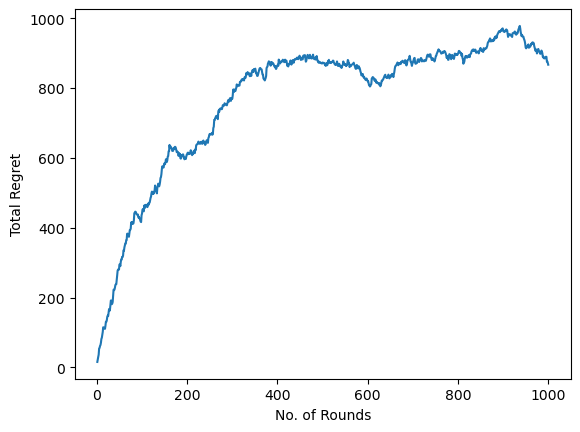

,round,arm_pulled,reward,cum_reward,regret
0,1,0,9,9,15.633819
1,2,10,17,26,23.267637
2,3,9,18,44,29.901456
3,4,4,18,62,36.535274
4,5,19,7,69,54.169093
...,...,...,...,...,...
995,996,21,25,23646,889.283315
996,997,21,38,23684,875.917133
997,998,21,24,23708,876.550952
998,999,21,30,23738,871.184770


In [28]:
given_rounds = 1000

result, cum_result = adaptive_epsilon_greedy("user40", "XEq6wByD", given_rounds + 1, True)

print("\n##########################################################################################")
print("Total Runs")
print("##########################################################################################\n")
# for elem in result:
#     print(elem)

print("\n##########################################################################################")
print("Regret Plot")
print("##########################################################################################\n")
result_df = regret(result, 1000)

result_df

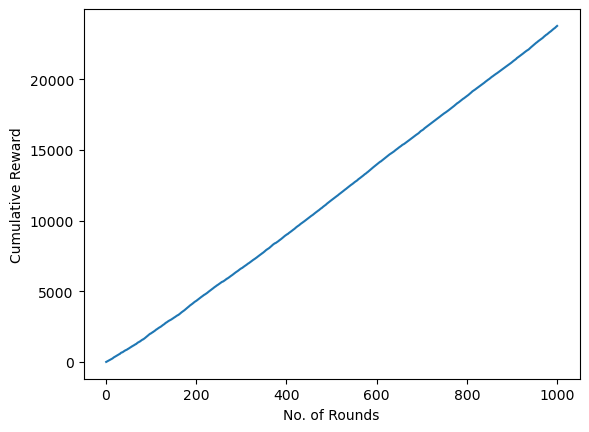

In [29]:
plt.plot(result_df["round"], result_df["cum_reward"])
plt.xlabel("No. of Rounds")
plt.ylabel("Cumulative Reward")
plt.show()

In [30]:
# Save regret dataframe as csv
result_df.to_csv('./csv_data/adapt_exp.csv', index=False)
print("Complete")

Complete


Round 1: current_epsilon = 1.0
# 1, Exploring Arm 9...
Round 2: current_epsilon = 0.5
# 2, Exploring Arm 3...
Round 3: current_epsilon = 0.3333333333333333
# 3, Exploiting Arm 9...
Round 4: current_epsilon = 0.25
# 4, Exploiting Arm 9...
Round 5: current_epsilon = 0.2
# 5, Exploiting Arm 9...
Round 6: current_epsilon = 0.16666666666666666
# 6, Exploiting Arm 9...
Round 7: current_epsilon = 0.14285714285714285
# 7, Exploiting Arm 9...
Round 8: current_epsilon = 0.125
# 8, Exploiting Arm 9...
Round 9: current_epsilon = 0.1111111111111111
# 9, Exploring Arm 6...
Round 10: current_epsilon = 0.1
# 10, Exploiting Arm 9...
Round 11: current_epsilon = 0.09090909090909091
# 11, Exploiting Arm 9...
Round 12: current_epsilon = 0.08333333333333333
# 12, Exploiting Arm 9...
Round 13: current_epsilon = 0.07692307692307693
# 13, Exploiting Arm 9...
Round 14: current_epsilon = 0.07142857142857142
# 14, Exploiting Arm 9...
Round 15: current_epsilon = 0.06666666666666667
# 15, Exploiting Arm 9...
Round 

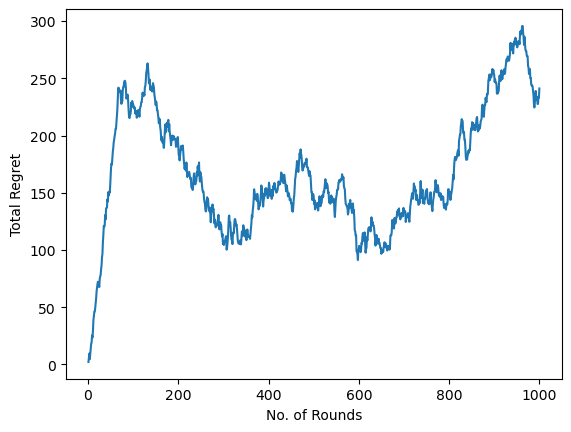

,round,arm_pulled,reward,cum_reward,regret
0,1,9,21,21,2.144086
1,2,3,19,40,6.288172
2,3,9,20,60,9.432258
3,4,9,28,88,4.576344
4,5,9,19,107,8.720430
...,...,...,...,...,...
995,996,13,29,22824,227.509677
996,997,13,23,22847,227.653763
997,998,13,17,22864,233.797849
998,999,13,24,22888,232.941935


In [31]:
given_rounds = 1000

result, cum_result = adaptive_epsilon_greedy("user40", "XEq6wByD", given_rounds + 1, False)

print("\n##########################################################################################")
print("Total Runs")
print("##########################################################################################\n")
# for elem in result:
#     print(elem)

print("\n##########################################################################################")
print("Regret Plot")
print("##########################################################################################\n")
result_df = regret(result, 1000)

result_df

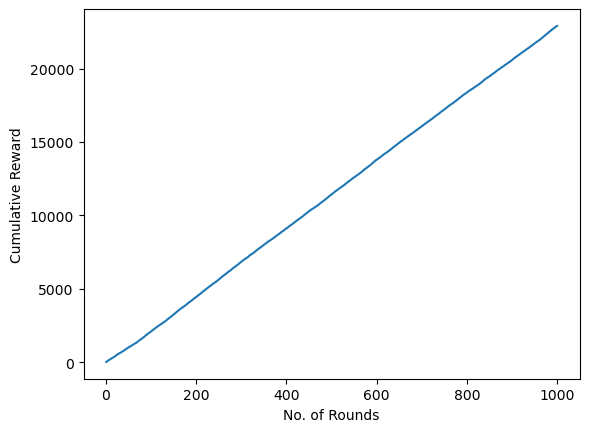

In [32]:
plt.plot(result_df["round"], result_df["cum_reward"])
plt.xlabel("No. of Rounds")
plt.ylabel("Cumulative Reward")
plt.show()

In [33]:
# Save regret dataframe as csv
result_df.to_csv('./csv_data/adapt_overt.csv', index=False)
print("Complete")

Complete
